# Flight Price Prediction

### 1.Uploading Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Flight price data.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Airline,Source,Destination,Dep_time,Arr_time,Duration,Total_Stops,Price
0,0,25-jul,Vistara,Chennai,Mumbai,09:45,11:40,1h 55m,Non Stop,"8,666"
1,1,25-jul,Vistara,Chennai,Mumbai,12:30,14:30,2h 00m,Non Stop,"8,666"
2,2,25-jul,Go First,Chennai,Mumbai,13:40,15:40,2h 00m,Non Stop,"8,666"
3,3,25-jul,Vistara,Chennai,Mumbai,20:30,22:35,2h 05m,Non Stop,"8,666"
4,4,25-jul,Air India,Chennai,Mumbai,15:25,17:10,1h 45m,Non Stop,"8,668"


In [4]:
df.shape

(2103, 10)

### About columns

Airline: Name of the airline used for traveling

Date_of_Journey: Date at which a person traveled

Source: Starting location of flight

Destination: Ending location of flight

Dep_Time: Departure time of flight from starting location

Arr_Time: Arrival time of flight at destination

Duration: Duration of flight in hours/minutes

Total_Stops: Number of total stops flight took before landing at the destination.
    
Price: Price of the flight

### 2. Data Cleaning

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Date           0
Airline        0
Source         0
Destination    0
Dep_time       0
Arr_time       0
Duration       0
Total_Stops    0
Price          0
dtype: int64

<AxesSubplot:>

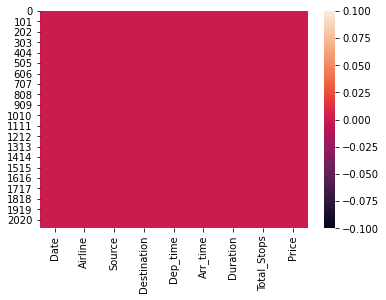

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103 entries, 0 to 2102
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2103 non-null   object
 1   Airline      2103 non-null   object
 2   Source       2103 non-null   object
 3   Destination  2103 non-null   object
 4   Dep_time     2103 non-null   object
 5   Arr_time     2103 non-null   object
 6   Duration     2103 non-null   object
 7   Total_Stops  2103 non-null   object
 8   Price        2103 non-null   object
dtypes: object(9)
memory usage: 148.0+ KB


In [9]:
df.describe(include='all')

,Date,Airline,Source,Destination,Dep_time,Arr_time,Duration,Total_Stops,Price
count,2103,2103,2103,2103,2103,2103,2103,2103,2103
unique,5,6,5,4,175,186,267,4,428
top,25-jul,Vistara,New Delhi,Mumbai,15:25,12:45,2h 15m,1 Stop,"8,579"
freq,609,665,1012,864,122,78,63,1372,220


### Pre processing

In [10]:
df['Duration']=df['Duration'].str.replace("h",':')
df['Duration']=df['Duration'].str.replace("m",'')
df['Duration']=df['Duration'].str.replace(" ",'')

In [11]:
df["Dur_hour"]=df['Duration'].str.split(':').str[0]
df["Dur_min"]=df['Duration'].str.split(':').str[1]
df.drop(["Duration"], axis = 1, inplace = True)

In [12]:
df.head()

,Date,Airline,Source,Destination,Dep_time,Arr_time,Total_Stops,Price,Dur_hour,Dur_min
0,25-jul,Vistara,Chennai,Mumbai,09:45,11:40,Non Stop,"8,666",1,55
1,25-jul,Vistara,Chennai,Mumbai,12:30,14:30,Non Stop,"8,666",2,00
2,25-jul,Go First,Chennai,Mumbai,13:40,15:40,Non Stop,"8,666",2,00
3,25-jul,Vistara,Chennai,Mumbai,20:30,22:35,Non Stop,"8,666",2,05
4,25-jul,Air India,Chennai,Mumbai,15:25,17:10,Non Stop,"8,668",1,45


In [13]:
df['Price']=df['Price'].str.replace(",","")

In [14]:
df['Day']=df['Date'].str.split("-").str[0]
df['Month']=df['Date'].str.split("-").str[1]

In [15]:
df.drop(["Date"], axis = 1, inplace = True)

In [16]:
column=['Airline', 'Source', 'Destination', 'Day', 'Month','Dep_time','Arr_time','Dur_hour','Dur_min','Total_Stops','Price']
  
# create the new index for columns
df=df.reindex(column, axis='columns')

In [17]:
df.head()

,Airline,Source,Destination,Day,Month,Dep_time,Arr_time,Dur_hour,Dur_min,Total_Stops,Price
0,Vistara,Chennai,Mumbai,25,jul,09:45,11:40,1,55,Non Stop,8666
1,Vistara,Chennai,Mumbai,25,jul,12:30,14:30,2,00,Non Stop,8666
2,Go First,Chennai,Mumbai,25,jul,13:40,15:40,2,00,Non Stop,8666
3,Vistara,Chennai,Mumbai,25,jul,20:30,22:35,2,05,Non Stop,8666
4,Air India,Chennai,Mumbai,25,jul,15:25,17:10,1,45,Non Stop,8668


In [18]:
df["Day"] = pd.to_datetime(df.Day, format="%d").dt.day
df['Month'] =df['Month'].str.replace('jul','7')
df["Month"] = pd.to_datetime(df["Month"], format = "%m").dt.month

In [19]:
df["Dur_hour"]=pd.to_numeric(df["Dur_hour"])
df["Dur_min"]=pd.to_numeric(df["Dur_min"])
df['Price']=pd.to_numeric(df['Price'])


## 3.EDA

In [20]:
for i in df.columns:
  print(df[i].value_counts())
  print("________________________________________")

Vistara      665
IndiGo       645
Air India    506
Go First     136
SpiceJet     103
Air Asia      48
Name: Airline, dtype: int64
________________________________________
New Delhi    1012
Lucknow       325
Chennai       305
Pune          236
Kochi         225
Name: Source, dtype: int64
________________________________________
Mumbai       864
Hyderabad    461
Goa          453
Bangalore    325
Name: Destination, dtype: int64
________________________________________
25    609
26    575
24    491
27    324
29    104
Name: Day, dtype: int64
________________________________________
7    2103
Name: Month, dtype: int64
________________________________________
15:25    122
07:20     51
19:45     45
10:35     43
08:00     40
        ... 
17:40      1
10:30      1
23:55      1
16:10      1
22:20      1
Name: Dep_time, Length: 175, dtype: int64
________________________________________
12:45    78
22:20    50
07:50    49
09:25    47
23:45    39
         ..
00:45     2
20:30     1
15:25     1
10:3

<AxesSubplot:xlabel='Price'>

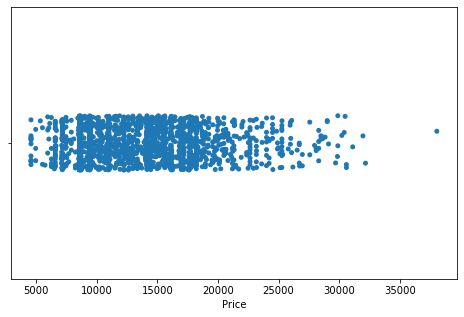

In [21]:
plt.figure(figsize=(8,5))
sns.stripplot(df['Price'])

New Delhi    1012
Lucknow       325
Chennai       305
Pune          236
Kochi         225
Name: Source, dtype: int64


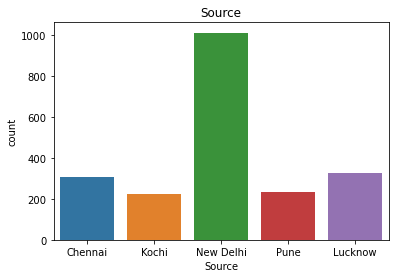

In [22]:
sns.countplot(df['Source'])
plt.title('Source')
print(df['Source'].value_counts())

1 Stop       1372
2 Stop(s)     396
Non Stop      308
3 Stop(s)      27
Name: Total_Stops, dtype: int64


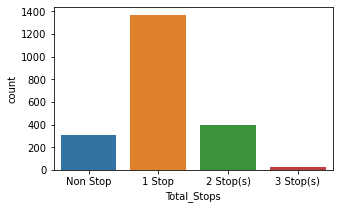

In [23]:
fig=plt.figure(figsize=(5,3))
sns.countplot(df['Total_Stops'])
print(df['Total_Stops'].value_counts())
plt.show()

25    609
26    575
24    491
27    324
29    104
Name: Day, dtype: int64


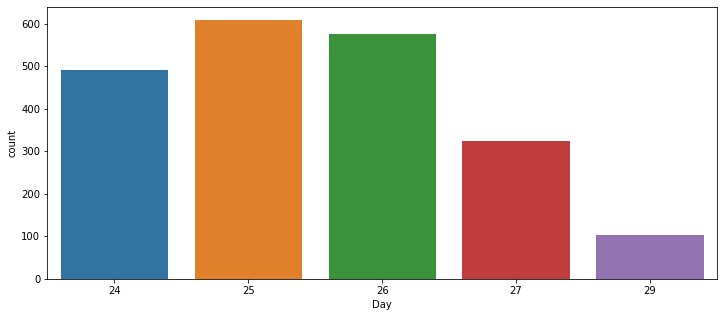

In [24]:
print(df['Day'].value_counts())
fig=plt.figure(figsize=(12,5))
sns.countplot(df['Day'])
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

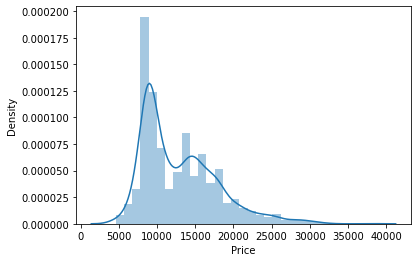

In [25]:
sns.distplot(df["Price"])

Vistara      665
IndiGo       645
Air India    506
Go First     136
SpiceJet     103
Air Asia      48
Name: Airline, dtype: int64


<AxesSubplot:xlabel='Airline', ylabel='count'>

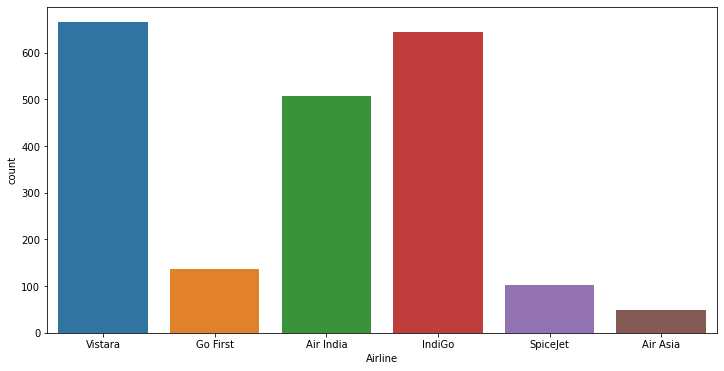

In [26]:
print(df['Airline'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'])


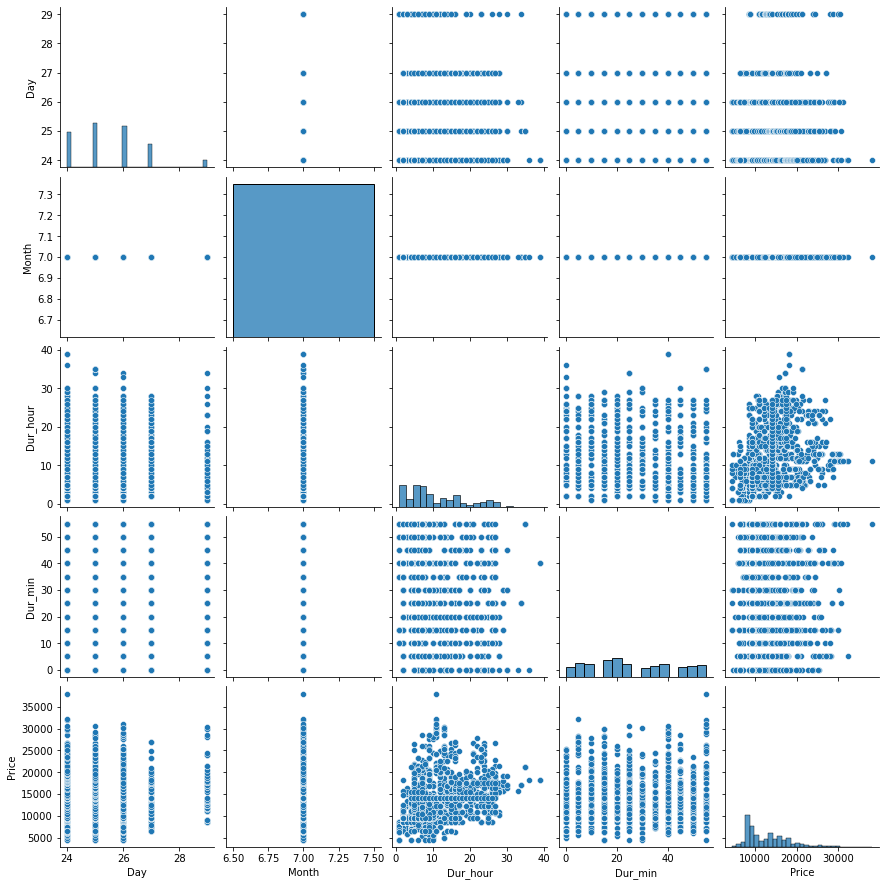

In [27]:
sns.pairplot(df)

<AxesSubplot:xlabel='Day', ylabel='Price'>

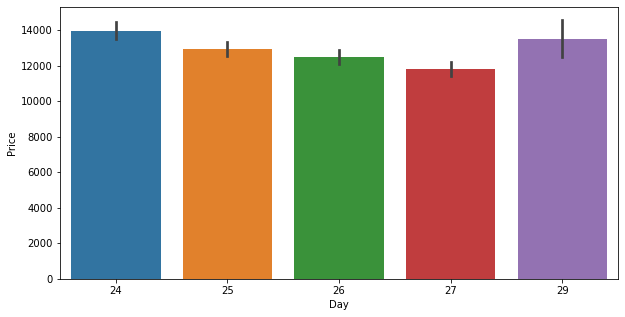

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(df['Day'],df['Price'])


<AxesSubplot:xlabel='Source', ylabel='Price'>

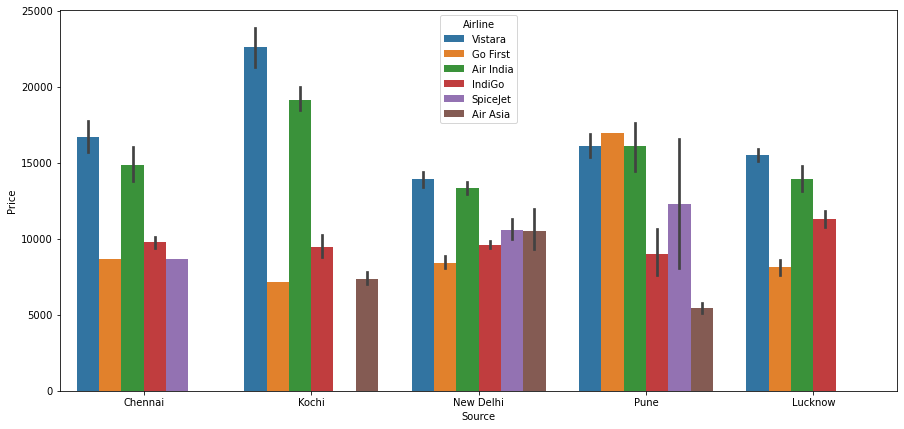

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(df['Source'],df['Price'],hue=df['Airline'])


<AxesSubplot:xlabel='Destination', ylabel='Price'>

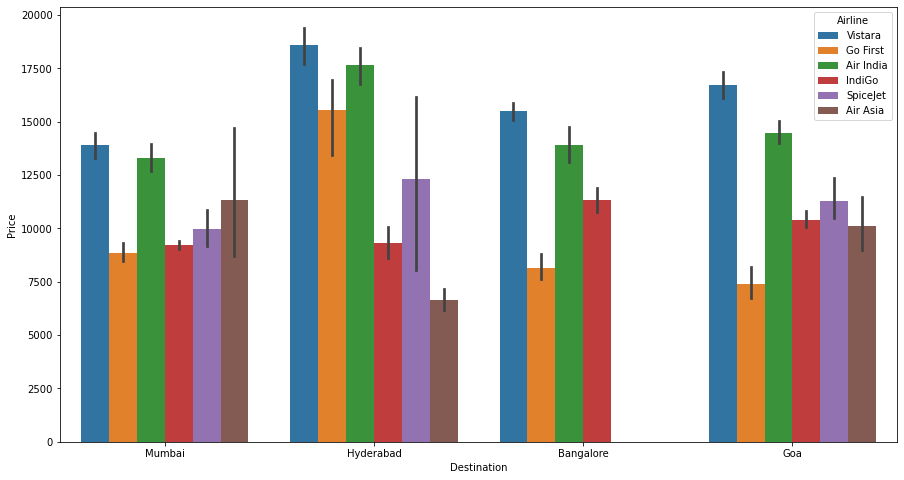

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(df['Destination'],df['Price'],hue=df['Airline'])


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

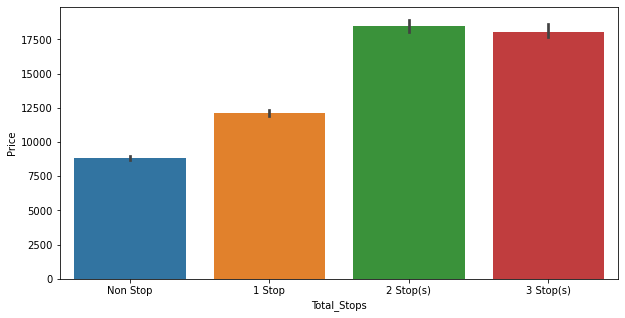

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(df['Total_Stops'],df['Price'])


<AxesSubplot:xlabel='Day', ylabel='Price'>

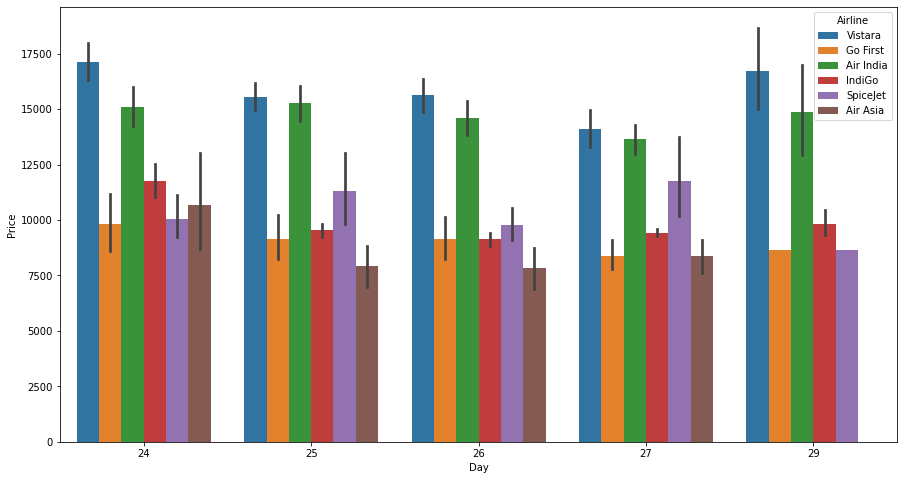

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(df['Day'],df['Price'],hue=df['Airline'])



<AxesSubplot:xlabel='Dur_hour', ylabel='Price'>

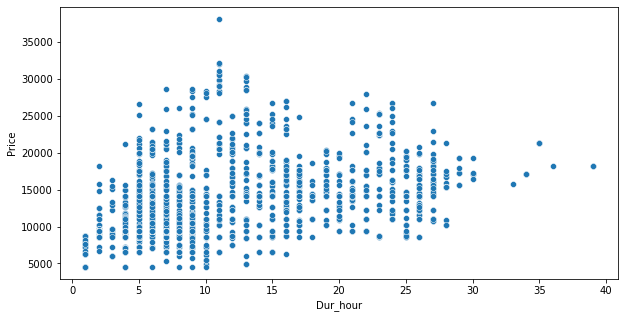

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Dur_hour'],df['Price'])

<Figure size 720x360 with 0 Axes>

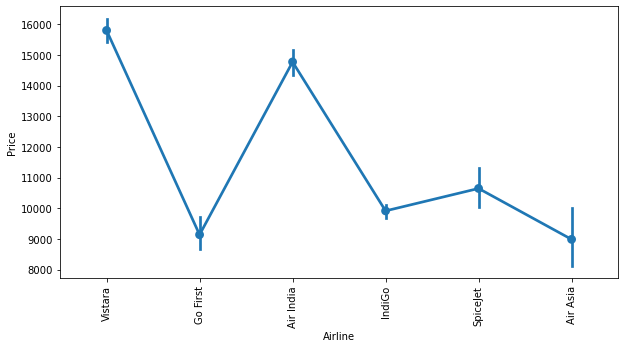

<Figure size 720x360 with 0 Axes>

In [34]:
plt.figure(figsize=(10,5))

sns.pointplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

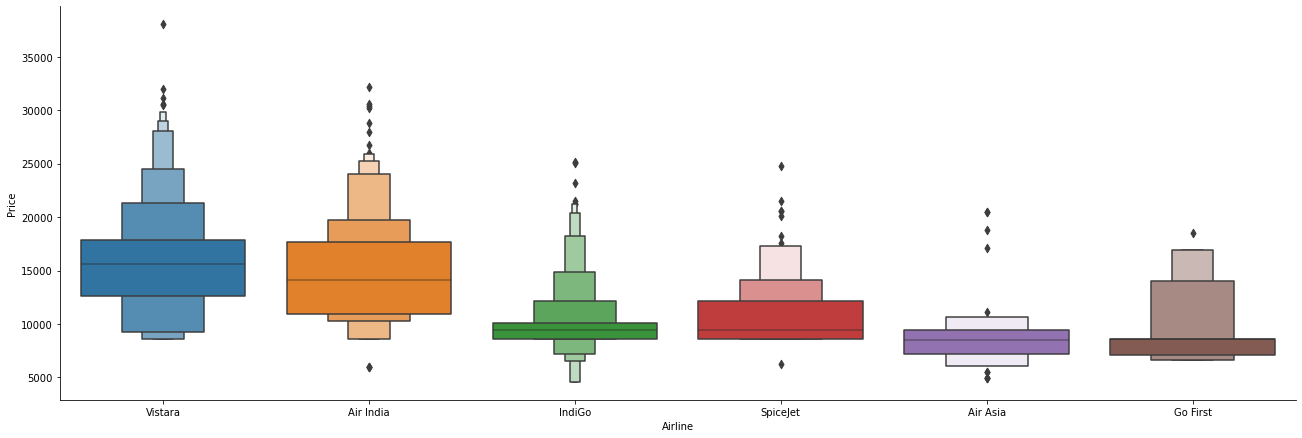

In [35]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Vistara'),
  Text(1, 0, 'Go First'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'Air Asia')])

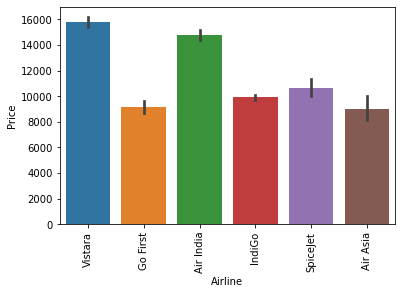

In [36]:
sns.barplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

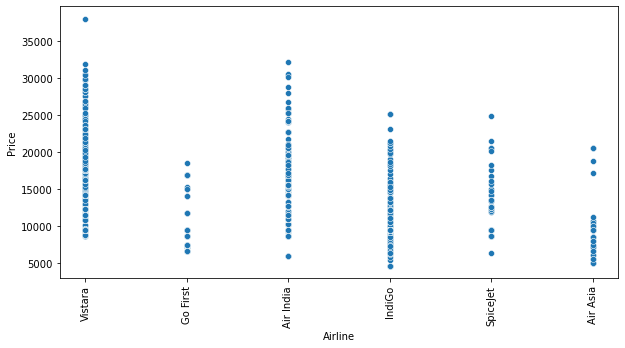

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

#### Correlation

In [38]:
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Airline,Source,Destination,Day,Month,Dep_time,Arr_time,Dur_hour,Dur_min,Total_Stops,Price
Airline,1.000000,-0.041535,0.085968,0.038686,NaN,0.035868,0.021563,-0.329588,0.036975,-0.256209,-0.068352
Source,-0.041535,1.000000,0.422914,0.169687,NaN,0.356819,0.319248,0.133541,0.037067,0.024935,0.768768
Destination,0.085968,0.422914,1.000000,0.116548,NaN,0.156413,0.537545,0.149992,0.123185,0.136287,0.657347
Day,0.038686,0.169687,0.116548,1.000000,NaN,0.039767,0.117639,-0.011618,0.040617,-0.073351,0.163213
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_time,0.035868,0.356819,0.156413,0.039767,NaN,1.000000,0.167180,0.042060,-0.033979,-0.061848,0.334821
Arr_time,0.021563,0.319248,0.537545,0.117639,NaN,0.167180,1.000000,0.200241,0.126435,0.085994,0.411935
Dur_hour,-0.329588,0.133541,0.149992,-0.011618,NaN,0.042060,0.200241,1.000000,0.024920,0.569040,0.172574
Dur_min,0.036975,0.037067,0.123185,0.040617,NaN,-0.033979,0.126435,0.024920,1.000000,-0.000684,0.021673
Total_Stops,-0.256209,0.024935,0.136287,-0.073351,NaN,-0.061848,0.085994,0.569040,-0.000684,1.000000,0.145051


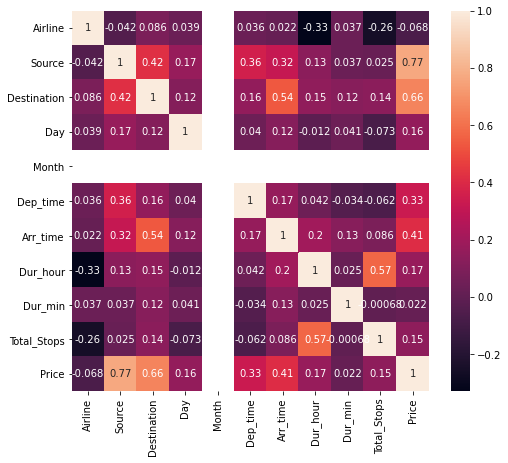

In [39]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(8,7))
sns.heatmap(df_corr,annot=True)
plt.show()

### Outcome of correlation
from heatmap source,Destination dataset has positive correlation .

Arrive time has 41 percent correlation with target column which can be considered as a good bond.

Departure time has 33 percent correlation with target column which can be considered as a good bond.

Duration  has 17 percent correlation with target column which can be considered as a good bond.

Day has 16 percent correlation with target column which can be considered as a good bond.

source has 77 percent correlation with target column which can be considered as a good bond.

Airline has -0.068% percent correlation with target column which can be considered as a negative bond.

max correlation : Source

min correlation: Airline

### 4.Data Preprocessing

#### Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [41]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Day', 'Month', 'Dep_time',
       'Arr_time', 'Dur_hour', 'Dur_min', 'Total_Stops', 'Price'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
df["Airline"] = LabelEncoder().fit_transform(df['Airline'])
df["Source"] = LabelEncoder().fit_transform(df['Source'])
df['Destination'] = LabelEncoder().fit_transform(df['Destination'])
df['Total_Stops'] = LabelEncoder().fit_transform(df['Total_Stops'])
df['Dep_time'] = LabelEncoder().fit_transform(df['Dep_time'])
df['Arr_time'] = LabelEncoder().fit_transform(df['Arr_time'])

### Removing outliers

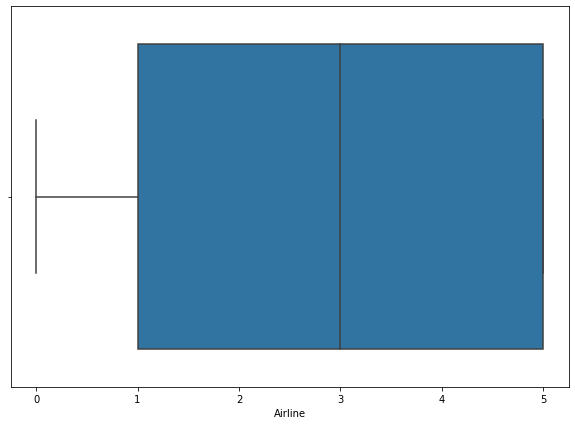

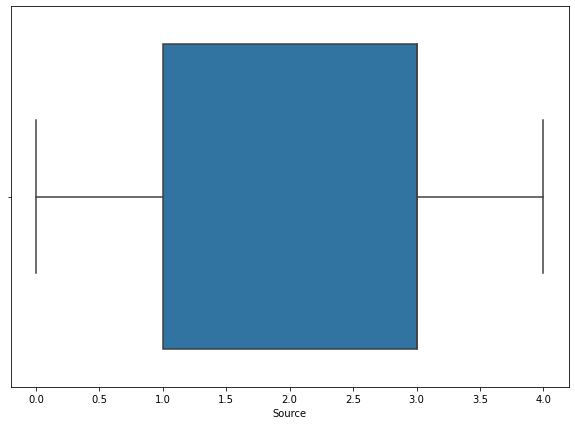

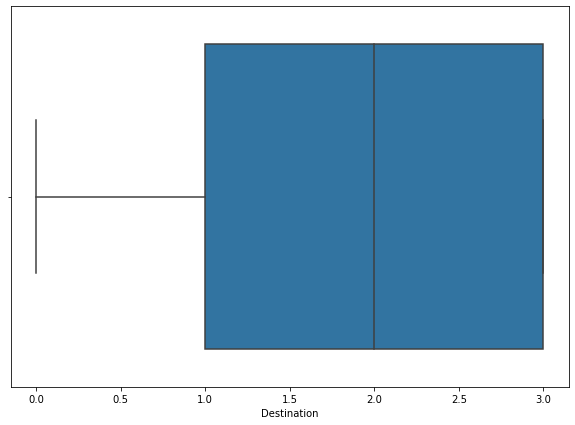

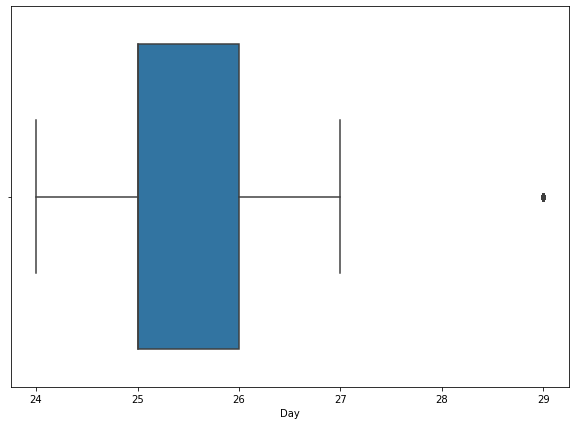

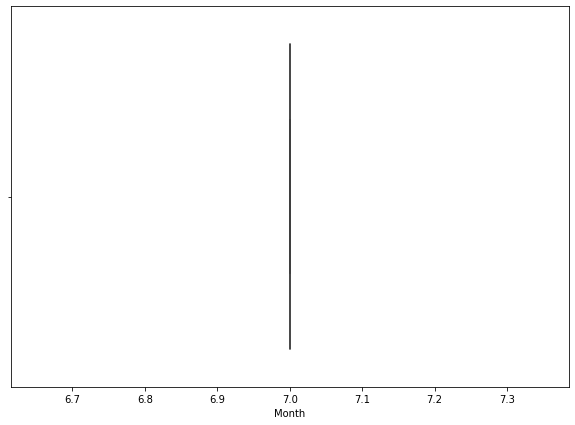

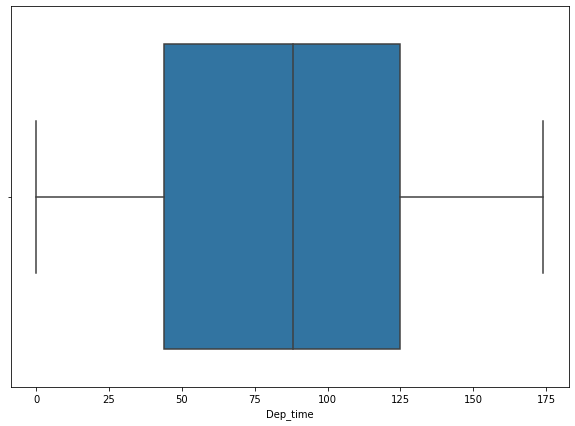

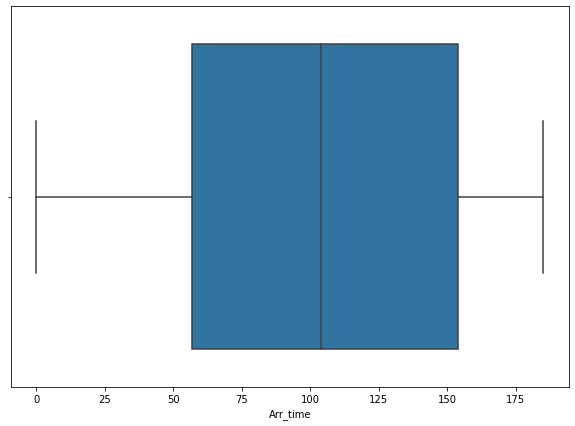

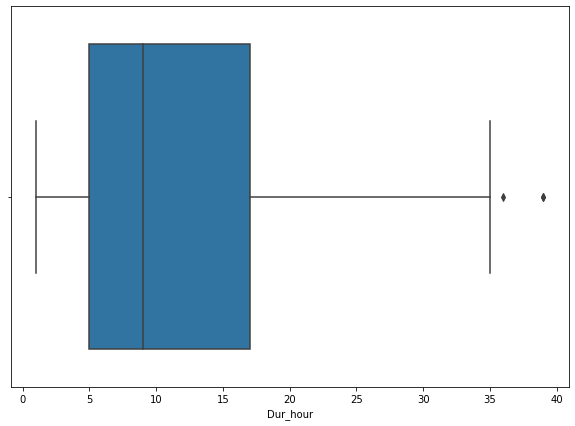

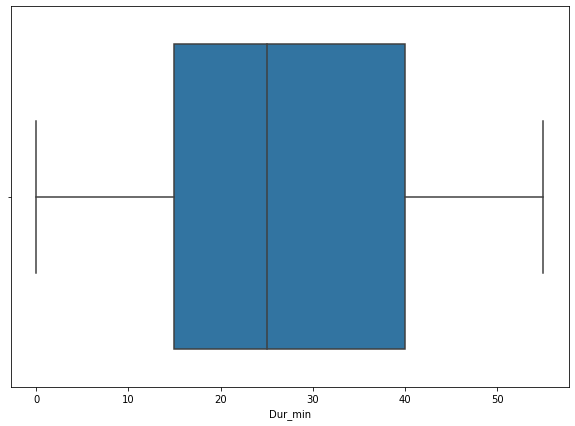

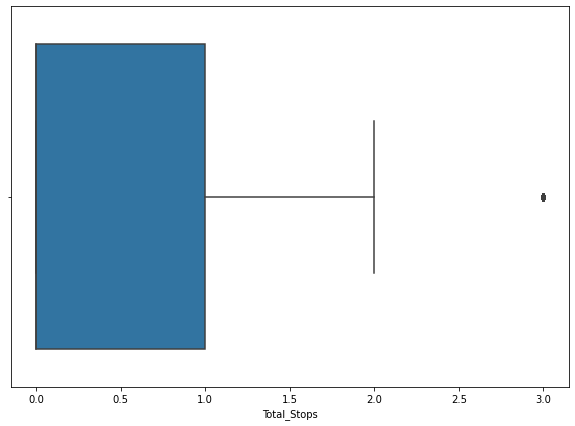

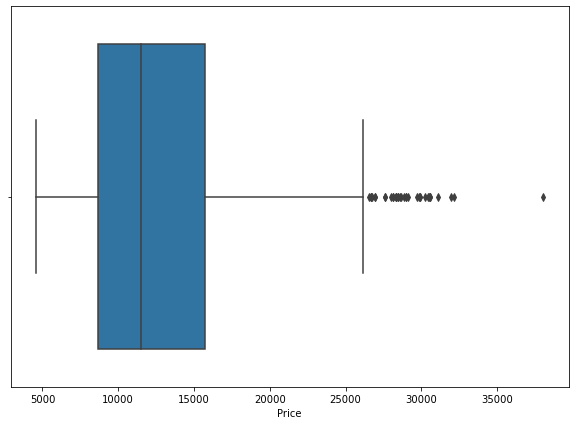

In [43]:
for i in df.columns:
    plt.figure(figsize = (10, 7))
    sns.boxplot(df[i])

outliers is low in this dataset

### Removing Skewness

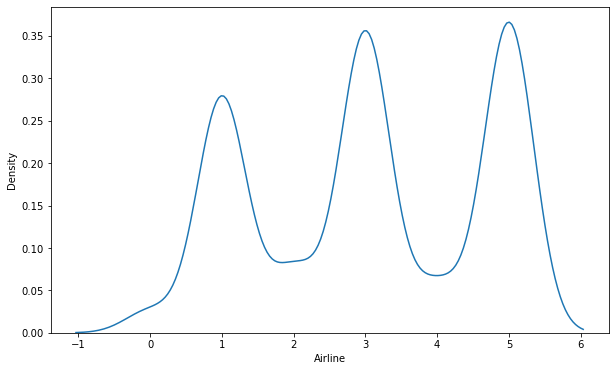

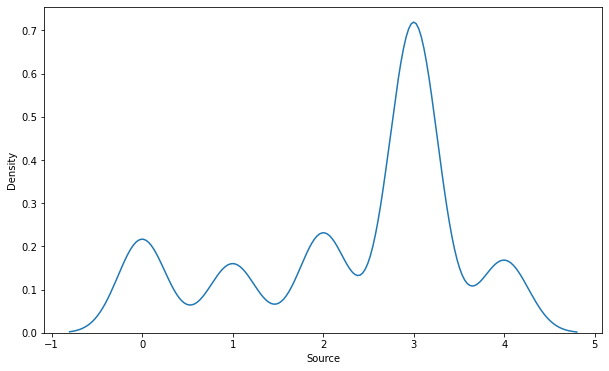

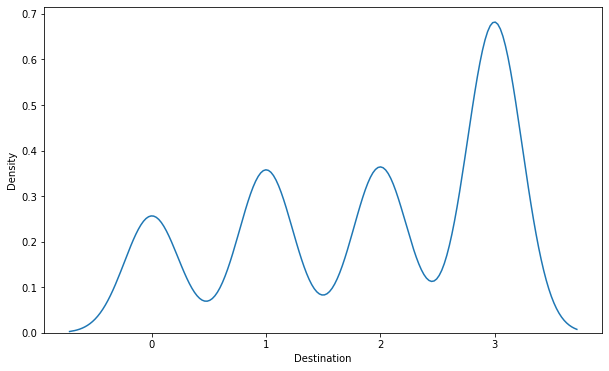

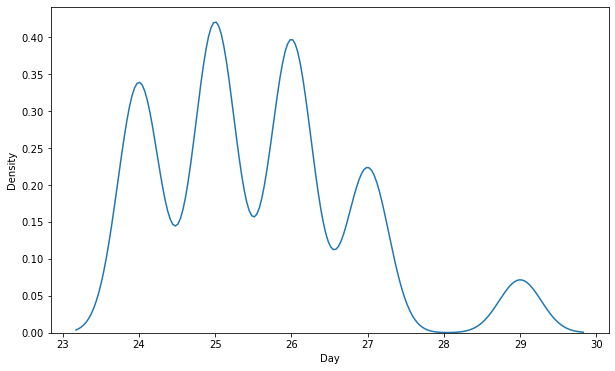

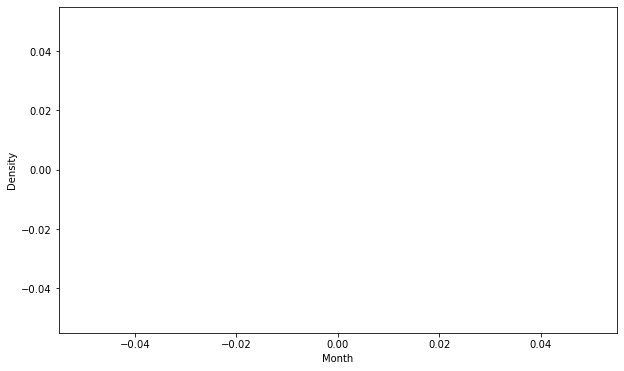

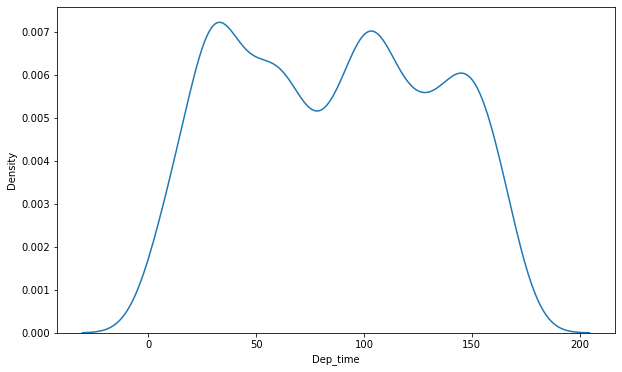

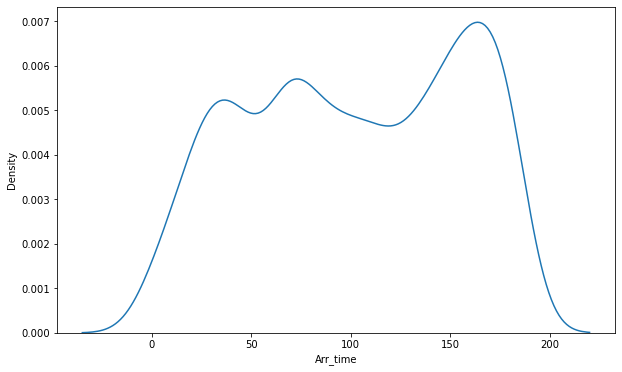

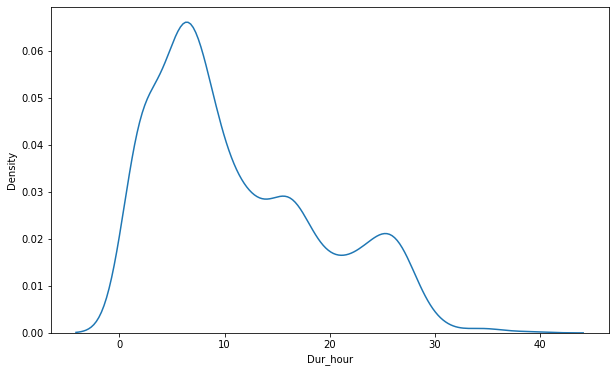

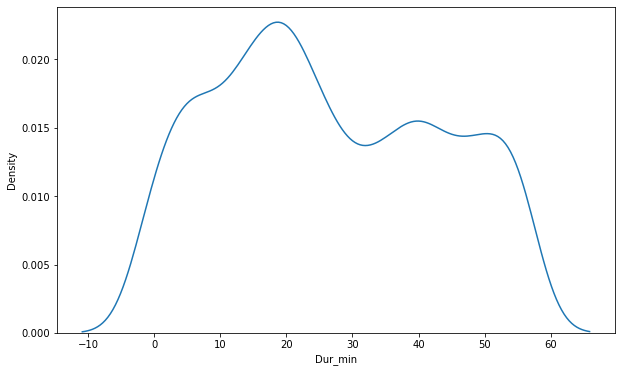

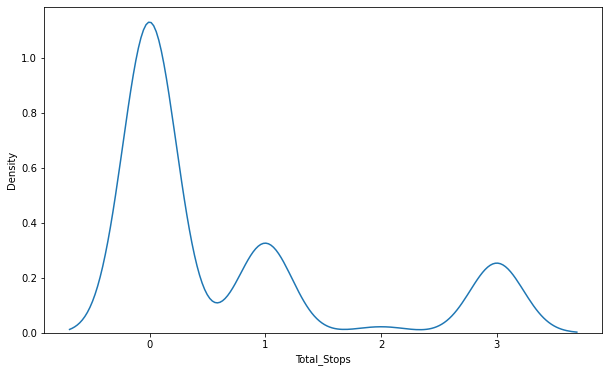

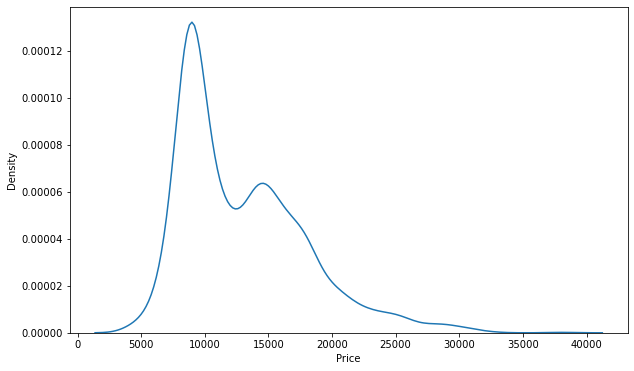

In [44]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

In [45]:
df.skew()

Airline       -0.133018
Source        -0.707096
Destination   -0.453672
Day            0.792582
Month          0.000000
Dep_time       0.038357
Arr_time      -0.118705
Dur_hour       0.752932
Dur_min        0.179403
Total_Stops    1.456016
Price          1.074009
dtype: float64

Using Square root transformation methord to reduce Skewness

In [46]:
#calculating the square root for data

df1 = np.sqrt(df)

df1.head(15)

,Airline,Source,Destination,Day,Month,Dep_time,Arr_time,Dur_hour,Dur_min,Total_Stops,Price
0,2.236068,0.0,1.732051,5.0,2.645751,7.211103,7.937254,1.000000,7.416198,1.732051,93.091353
1,2.236068,0.0,1.732051,5.0,2.645751,8.888194,9.486833,1.414214,0.000000,1.732051,93.091353
2,1.414214,0.0,1.732051,5.0,2.645751,9.433981,10.049876,1.414214,0.000000,1.732051,93.091353
3,2.236068,0.0,1.732051,5.0,2.645751,12.288206,13.076697,1.414214,2.236068,1.732051,93.091353
4,1.000000,0.0,1.732051,5.0,2.645751,10.246951,10.862780,1.000000,6.708204,1.732051,93.102094
5,1.732051,0.0,1.732051,5.0,2.645751,2.000000,4.242641,1.000000,7.071068,1.732051,93.102094
6,1.732051,0.0,1.732051,5.0,2.645751,6.000000,6.855655,1.000000,7.071068,1.732051,93.102094
7,1.732051,0.0,1.732051,5.0,2.645751,8.544004,9.000000,1.000000,7.071068,1.732051,93.102094
8,1.732051,0.0,1.732051,5.0,2.645751,9.110434,9.591663,1.000000,7.071068,1.732051,93.102094
9,1.732051,0.0,1.732051,5.0,2.645751,11.357817,12.083046,1.000000,7.071068,1.732051,93.102094


In [47]:
df1.skew()

Airline       -0.788851
Source        -1.386350
Destination   -1.150431
Day            0.726101
Month          0.000000
Dep_time      -0.482686
Arr_time      -0.683690
Dur_hour       0.191812
Dur_min       -0.691945
Total_Stops    0.949904
Price          0.660609
dtype: float64

Skewness is reduced

In [48]:
df=df1

In [49]:
y = df['Price']
x = df.drop('Price', axis = 1)

### Test Train split

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [51]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [52]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### FINDING BEST random_state

In [54]:
maxAcc=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lm=LinearRegression(fit_intercept=True, normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accurancy',acc, 'random_state',i)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
    print('accurancy',maxAcc, 'random_state',i)

print('Best accurancy is ',maxAcc, ' on random_state',maxRs)

accurancy 0.2998224382699617 random_state 0
accurancy 0.2998224382699617 random_state 0
accurancy 0.2883812899965288 random_state 1
accurancy 0.2998224382699617 random_state 1
accurancy 0.35292362129960386 random_state 2
accurancy 0.35292362129960386 random_state 2
accurancy 0.33824953517219336 random_state 3
accurancy 0.35292362129960386 random_state 3
accurancy 0.3829950267391792 random_state 4
accurancy 0.3829950267391792 random_state 4
accurancy 0.3431838342675798 random_state 5
accurancy 0.3829950267391792 random_state 5
accurancy 0.3733563468562695 random_state 6
accurancy 0.3829950267391792 random_state 6
accurancy 0.3661907679819443 random_state 7
accurancy 0.3829950267391792 random_state 7
accurancy 0.3617766965307948 random_state 8
accurancy 0.3829950267391792 random_state 8
accurancy 0.3376250999805229 random_state 9
accurancy 0.3829950267391792 random_state 9
accurancy 0.3362618386558702 random_state 10
accurancy 0.3829950267391792 random_state 10
accurancy 0.38159233419251

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=77)

### 5.MODEL CONSTRUCTION

### i)LinearRegression

In [56]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.3465026175034558


In [57]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  11.89677183920801
Mean Squared Error:  245.94951129383546
Root Mean Squared Error:  15.6827775375995
Explained Variance Score:  0.41351102158751174
r2_score: 0.41325330127205406


 C-V score

In [58]:
LR_cv=cross_val_score(LR,x,y, cv = 7).mean()
LR_cv

0.21430167970793804

### ii)RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.968963949450149


In [60]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  5.3432514807257405
Mean Squared Error:  82.95830259563431
Root Mean Squared Error:  9.108144849289252
Explained Variance Score:  0.8021874407671816
r2_score: 0.8020914539573536


In [61]:
rf_cv=cross_val_score(rf,x,y, cv = 4).mean()
rf_cv

0.294857579994893

### iii)DecisionTreeRegressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9973179639636564


In [63]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  5.219514018310737
Mean Squared Error:  117.90873268432371
Root Mean Squared Error:  10.858578759871095
Explained Variance Score:  0.7189379725508329
r2_score: 0.7187123516132117


In [64]:
DTR_cv=cross_val_score(DTR,x,y, cv = 11).mean()
DTR_cv

0.16288642991280936

### iv)SVR

In [65]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.25254517669953436


In [66]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  12.46118287792676
Mean Squared Error:  297.3889867973557
Root Mean Squared Error:  17.244969898418372
Explained Variance Score:  0.33525204425895516
r2_score: 0.2905372922943853


In [67]:
svr_cv=cross_val_score(svr,x,y, cv = 4).mean()
svr_cv

0.049016476338164555

### v)GradientBoostingRegressor

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7604872920471238


In [69]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  7.3508977448673765
Mean Squared Error:  108.96217318512662
Root Mean Squared Error:  10.438494775834618
Explained Variance Score:  0.740125860127792
r2_score: 0.7400556111444561


In [70]:
GBR_cv=cross_val_score(GBR,x,y, cv = 11).mean()
GBR_cv

0.5194233581985783

### vi)Ridge

In [71]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.34648191366958614


In [72]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  11.889340454009282
Mean Squared Error:  245.69948789058552
Root Mean Squared Error:  15.674804237711728
Explained Variance Score:  0.41410855697450344
r2_score: 0.41384976680552843


In [73]:
R_cv=cross_val_score(R,x,y, cv = 7).mean()
R_cv

0.21467791893817187

### After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 2 best models choosen for hyper parameter tuning are 
1.RandomForestRegressor

2.DecisionTreeRegressor

## 6.Hyper parameter tuning

### 1.RandomForestRegressor

In [74]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [75]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [76]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [77]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [78]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [79]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  5.224016915720153
Mean Squared Error:  79.01937368140717
Root Mean Squared Error:  8.889284205233128
Explained Variance Score:  0.8115846876705892
r2_score: 0.8114883156335115


### 2.DecisionTreeRegressor

In [80]:
from sklearn.model_selection import GridSearchCV
parameter = {'max_features':['auto', 'sqrt', 'log2'],
             'criterion':['mse','friedman_mse','mae', 'poisson'],
             'splitter':['best', 'random']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [81]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [82]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}

In [83]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='friedman_mse',splitter= 'best',max_features='auto')
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [84]:
print("Score of Model is",DTR.score(x_train,y_train))
print("Mean Absolute Error", mean_absolute_error(y_test,DTR_final))
print("Root Mean Squared Error", (mean_squared_error(y_test,DTR_final))**0.5 )

Score of Model is 0.9973179639636564
Mean Absolute Error 5.599978309638314
Root Mean Squared Error 11.464012525518587


In [85]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  5.599978309638314
Mean Squared Error:  131.42358318524705
Root Mean Squared Error:  11.464012525518587
Explained Variance Score:  0.6870029224923946
r2_score: 0.686470799786159


### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS Random Forest Regressor

In [86]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  5.224016915720153
Mean Squared Error:  79.01937368140717
Root Mean Squared Error:  8.889284205233128
Explained Variance Score:  0.8115846876705892
r2_score: 0.8114883156335115


<AxesSubplot:xlabel='Price', ylabel='Density'>

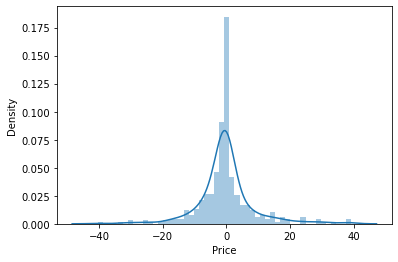

In [87]:
sns.distplot(y_test-rf_predictions)

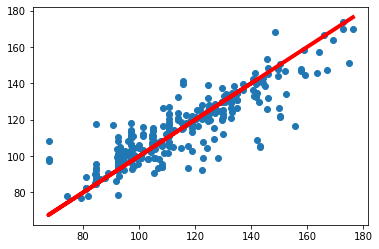

In [88]:
plt.scatter(y_test,rf_predictions)
plt.plot(y_test,y_test,linewidth=4,color='Red')

## 7.SAVING THE MODEL

In [89]:
import joblib
joblib.dump(rf,"final model.pkl")

['final model.pkl']

### Analysis on the data.

1,Do airfares change frequently? 

          Yes, Based on Season and Demand of the flight Tickets Price changes regularly.

2,Do they move in small increments or in large jumps? 

           Ans. large jumps, If you buy a ticket before few of date of journey you will get arround 44% high price

3,Do they tend to go up or down over time? 
       
         Ans. Price of the flight goes up only down over time but its not reduces the price over time

4,What is the best time to buy so that the consumer can save the most by taking the least risk? 

         Ans. Consumer should buy the ticket before 30 days of date of joureney so they can save up to 45% to 50%,

5,Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? 

        Ans. Yes, price of the flight will increase step by step near to departure date, likeIndigo is cheaper then 
        spice jet Airways


6,Are morning flights expensive? 

           Ans: No,As per the demostic flight of india all price of the flights will be same throught the day